# Exploration des données

## Importation librairies et dataset

In [13]:
import numpy as np
import pandas as pd
import pickle
import sweetviz as sv

In [14]:
data_lg = pd.read_pickle("datasets/dataset.pkl")
data_sm = pd.read_pickle("datasets/dataset_withoutBadValues.pkl")


In [15]:
data = data_sm
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473218 entries, 0 to 899161
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           473218 non-null  object        
 1   City           473218 non-null  object        
 2   State          473218 non-null  category      
 3   Zip            473218 non-null  object        
 4   Bank           473218 non-null  object        
 5   BankState      473218 non-null  category      
 6   NAICS          473218 non-null  object        
 7   ApprovalDate   473218 non-null  datetime64[ns]
 8   ApprovalFY     473218 non-null  category      
 9   Term           473218 non-null  int64         
 10  NoEmp          473218 non-null  int64         
 11  NewExist       473218 non-null  category      
 12  CreateJob      473218 non-null  int64         
 13  RetainedJob    473218 non-null  int64         
 14  FranchiseCode  473218 non-null  object        
 15  Urban

## Description des features

| Colonne        | Type de données   | Modalités                 | Exemple de Données | Description                                       |
|----------------|-------------------|---------------------------|--------------------|---------------------------------------------------|
| Name           | Object            | N/A                       | "Entreprise A"     | Nom de l'entreprise souhaitant réaliser le prêt   |
| City           | Object            | N/A                       | "New York"         | Ville où se l'entreprise                          |
| State          | Category          | "NY", "CA" ...            | "NY"               | État où se situe l'entreprise (abréviations en deux lettres)|
| Zip            | Object            | N/A                       | 10001              | Code postal de l'entreprise                       |
| Bank           | Object            | N/A                       | "ABC Bank"         | Nom de la banque accordant le prêt                |
| BankState      | Category          | "NY", "CA"...             | "NY"               | État où se situe la banque (abréviations en deux lettres)|
| NAICS          | Object            | N/A                       | 722410             | Code du secteur d'activité de l'entreprise        |
| ApprovalDate   | Datetime64[ns]    | N/A                       | 2023-05-12         | Date à laquelle le prêt a été approuvé            |
| ApprovalFY     | Category          | "1970", "1971" ..         | "2023"             | Année fiscale du prêt                             |
| Term           | Int64             | N/A                       | 60                 | Durée du prêt en mois                             |
| NoEmp          | Int64             | N/A                       | 10                 | Nombre d'employés de l'entreprise                 |
| NewExist       | Category          | "New", "Existing", "0"    | "Existing"         | Indication si l'entreprise est créé depuis moins de deux ans|
| CreateJob      | Int64             | N/A                       | 5                  | Nombre d'emplois créés par le prêt                |
| RetainedJob    | Int64             | N/A                       | 8                  | Nombre d'emplois conservés grâce au prêt          |
| FranchiseCode  | Object            | 0, 11500, 12564 ...       | 0                  | Code indiquant si l'entreprise est une franchise (0 si non franchisé)|
| UrbanRural     | Category          | "Urban", "Rural", "0"     | Urban              | Type d'environnement où se situe l'entreprise  (0 si non défini)|
| RevLineCr      | Category          | "Y", "N", "0"             | "Y"                | Indication si une ligne de crédit  est renouvelable (0 si non défini) |
| LowDoc         | Category          | "Y", "N", "0"             | "N"                | Indication si la demande de prêt peut être fait en 1 page (0 si non défini) |
| MIS_Status     | Int64             | 0, 1                      | 1                  | Statut du prêt (0 si non remboursé, 1 si remboursé)  |
| GrAppv         | Int64             | N/A                       | 150000             | Montant total approuvé pour le prêt               |
| SBA_Appv       | Int64             | N/A                       | 75000              | Montant approuvé par la SBA pour le prêt          |
| Zip2           | Category          | "10", "20", "30", ...     | "10"               | Code postal de l'entreprise (les 2 premiers chiffres) |
| NAICS2         | Category          | "12", "13"  ...           | "12"               | Code du secteur d'activité de l'entreprise (les 2 premiers chiffres) |
| Franchised     | Category          | "Y", "N"                  | "N"                 | Indication si l'entreprise est une franchise     |
| RealEstate     | Category          | "Y", "N"                  | "Y"                | Indication  si le prêt est lié à l'immobilier     |



## Exploration avec SweetViz

In [16]:
report = sv.analyze(data, "MIS_Status")
report.show_html("sv-reports/report_sm.html", layout="vertical")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report sv-reports/report_sm.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Autres explorations

In [17]:
subway_subset = data[data["Name"] == "SUBWAY"]

display(subway_subset.head())

subway_subset["MIS_Status"].value_counts()


,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Zip2,NAICS2,Franchised,RealEstate
24,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,722211,2006-02-07,2006,126,...,Urban,N,N,1,137300,116705,72,72,N,N
8287,SUBWAY,NORWICH,CT,6360,BANK OF AMERICA NATL ASSOC,RI,722211,2004-09-08,2004,36,...,Urban,Y,N,1,47000,23500,63,72,Y,N
75411,SUBWAY,REISTERSTOWN,MD,21136,"PNC BANK, NATIONAL ASSOCIATION",DE,722211,2006-03-31,2006,24,...,Urban,Y,N,1,10000,5000,21,72,N,N
85890,SUBWAY,MEDICINE LODGE,KS,67104,THE PEOPLES BANK,KS,722211,2006-04-06,2006,120,...,Rural,N,N,1,58000,49300,67,72,Y,N
87169,SUBWAY,MILTON,WV,25541,CAPITAL ONE NATL ASSOC,VA,722211,2006-02-07,2006,36,...,Rural,Y,N,0,35000,17500,25,72,N,N


MIS_Status
1    184
0     16
Name: count, dtype: int64

In [18]:
pizza_subset = data[data["Name"] == "DOMINO'S PIZZA"]

display(pizza_subset.head())

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Zip2,NAICS2,Franchised,RealEstate
204201,DOMINO'S PIZZA,CUYAHOGA FALLS,OH,44223,BANCO POPULAR NORTH AMERICA,NY,722211,2006-09-27,2006,59,...,Urban,Y,N,0,25000,12500,44,72,Y,N
235889,DOMINO'S PIZZA,GARDEN CITY,KS,67846,KEARNY COUNTY BANK,KS,722211,2007-02-09,2007,113,...,Rural,N,N,0,124000,105400,67,72,Y,N
245347,DOMINO'S PIZZA,CLEBURNE,TX,76031,COMMUNITY BANK,TX,722211,2007-03-26,2007,81,...,Urban,N,N,1,383000,287250,76,72,Y,N
252683,DOMINO'S PIZZA,DETROIT,MI,48205,CITIZENS BANK NATL ASSOC,RI,722110,2007-10-25,2008,84,...,Urban,Y,N,1,50000,25000,48,72,N,N
304652,DOMINO'S PIZZA,DAVIS,CA,95616,BANCO POPULAR NORTH AMERICA,NY,722211,2007-12-18,2008,74,...,Urban,Y,N,0,25000,12500,95,72,Y,N


In [19]:
naics_subset = data[data["NAICS"] == 0]
display(naics_subset)

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Zip2,NAICS2,Franchised,RealEstate


In [23]:
data_orignel = pd.read_csv("datasets/SBAnational.csv")

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_8478/3584019428.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_orignel = pd.read_csv("datasets/SBAnational.csv")


On se rend compte que dans la feature RevLineCr certaine valeurs étaient à 'T'. Ceci vient d'une faute de frappe car le 'T' se trouve a cote du 'Y' sur les claviers. 
On a donc remplacé les 'T' par des 'Y'

In [24]:
nombre_de_T = data_orignel["RevLineCr"].str.count('T').sum()
print(nombre_de_T)


15284.0


La feature NAICS est composé de nombre. Or seul les deux premiers chiffre du NAICS correspond à un secteur d'activité. Nous avons donc créer une feature NAICS2 qui ne comprends que ces valeur.

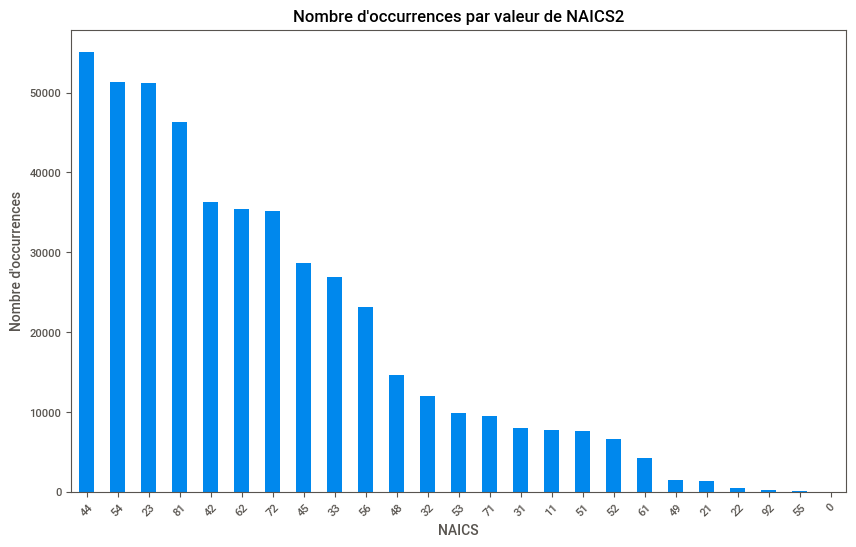

In [26]:
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences de chaque valeur dans la colonne 'NAICS'
counts = data['NAICS2'].value_counts()

# Créer le graphe
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Nombre d\'occurrences par valeur de NAICS2')
plt.xlabel('NAICS')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

On voit sur le graphe suivant, que plus l'entreprise fait un prêt sur du long therme, plus il y a de chance que le prêt soit remboursé.

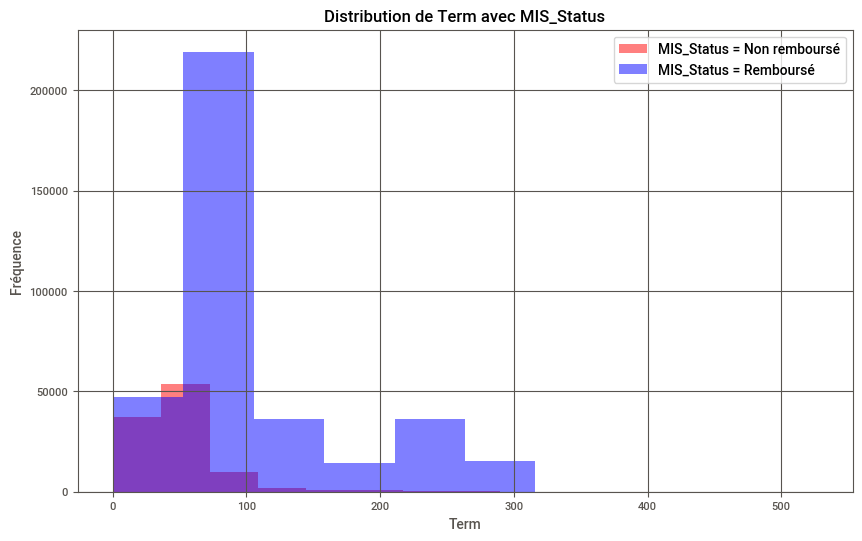

In [45]:
import matplotlib.pyplot as plt

# Diviser les données en fonction de MIS_Status
mis_0 = data[data['MIS_Status'] == 0]
mis_1 = data[data['MIS_Status'] == 1]

# Créer le graphe
plt.figure(figsize=(10, 6))

# Afficher l'histogramme de Term pour MIS_Status = 0 en rouge
plt.hist(mis_0['Term'], bins=10, color='red', alpha=0.5, label='MIS_Status = Non remboursé')

# Afficher l'histogramme de Term pour MIS_Status = 1 en bleu
plt.hist(mis_1['Term'], bins=10, color='blue', alpha=0.5, label='MIS_Status = Remboursé')

plt.title('Distribution de Term avec MIS_Status')
plt.xlabel('Term')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()
